Любой текст.
Высокая цель: уменшить размерность векторного представления слов текстуальных данных.Построить граифики уменьшения размерности. 
    
1. Загрузка текстового файла из корневого каталога.
2. Обработка текстовых данных.
3. Понижение размерности текстовых данных.
4. Построить график объема информации. 
5. Сколько компонент нужно оставить что бы сохранить 90% информации. 
6. Попробовать восстановить пару исходных слов. 



Дедлайн 12.01 23.59 2025

 Размерность вектора преобразованного текста: {(313, 1673)}
Длина словаря преобразованного текста 1673
Длина словаря, со словами, встречающимися  1  и более раз. (Длина вектора)    1673
Длина словаря, со словами, встречающимися  2  и более раз. (Длина вектора)    516
Длина словаря, со словами, встречающимися  3  и более раз. (Длина вектора)    290
Длина словаря, со словами, встречающимися  4  и более раз. (Длина вектора)    204
Для оставления 90 процентов информации необходимо откинуть  168  фич


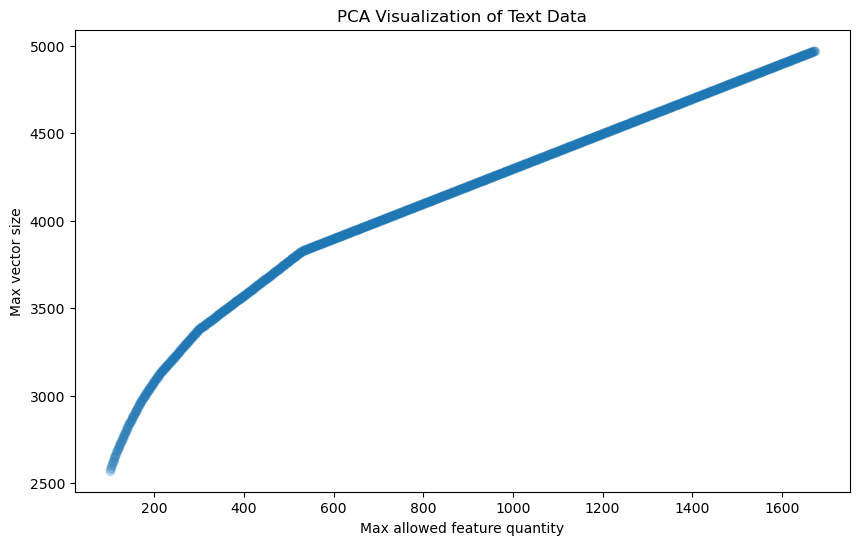

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
import numpy as np
import pandas as pd
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

MAX_FEATURES = 1673 # MAX DIMENSION OF VACABULARY
SENTENCES = 313 # QUANTITY OF SENTENCES
np.set_printoptions(edgeitems=30, linewidth=100000, 
    formatter=dict(float=lambda x: "%.3g" % x))

#Откроем файл и разобъем его на предложения:
f = open("book.txt", "r")
text = f.read()
full_words_in_text = len(text.split(" "))
#Разобъем текст на предложения для дальнейшей обработки.
sentences = text.split(".")

# Создадим класс CountVectorizer для преобразования предложений в векторы.
cv=CountVectorizer() 
# this steps generates word counts for the words in your docs 
word_count_vector=cv.fit_transform(sentences)
print(f' Размерность вектора преобразованного текста:',{word_count_vector.shape})
# Создадим словарь, выведем его на печать.
vacabulary = cv.vocabulary_
print("Длина словаря преобразованного текста", len(vacabulary))
#print(vacabulary)
#print(word_count_vector)

# Создадим цикл для подсчета количеств размерностей вектора, где минимальная входимость слов от 1 до 5
for i in range (1 , 5) :
    cv2 = CountVectorizer(min_df=i)
    word_count_vector2=cv2.fit_transform(sentences)
    vacabulary2 = cv2.vocabulary_
    print("Длина словаря, со словами, встречающимися ",i," и более раз. (Длина вектора)","  ",len(vacabulary2))    


# Создадим список зависимости количества фич от максимально допустимой размерности:
count_size_dependency_list = []

no_output = False
for i in range (MAX_FEATURES , 100,-1) :
    cv2 = CountVectorizer(max_features=i)
    word_count_vector2=cv2.fit_transform(sentences)
    vacabulary2 = cv2.vocabulary_
    #   Добавляем в список значения МАКСИМАЛЬНО ДОПУСТИМОЕ КОЛИЧЕСТВО ФИЧ/ РАЗМЕР ВЕКТОРА
    count_size_dependency_list.append([i,word_count_vector2.size])          
    if len(vacabulary2)/MAX_FEATURES<0.9 and no_output==False: 
        print("Для оставления 90 процентов информации необходимо откинуть ",MAX_FEATURES - i ," фич")
        no_output=True             
    
    
#print(count_size_dependency_list)
# Для передачи в функцию матплотлиб, преобразуем лист в массив NUMPY
arr = np.array(count_size_dependency_list)
# выводим на печать полученный график:
plt.figure(figsize=(10, 6))
plt.scatter(arr[:, 0], arr[:, 1], alpha=0.2)
plt.title('PCA Visualization of Text Data')
plt.xlabel('Max allowed feature quantity')
plt.ylabel('Max vector size')
plt.show()



Участок графика 516-1673 - Частота 1, слова встречающиеся по одному разу.
Участок графика 290-516 - Частота 2, слова, встречающиеся по 2 раза.
Участок графика 204-290 - Частота 3, слова, встречающиеся по 3 раза.


По графику видно, что если ограничивать максимальное количество фич, график линейно уменьшается (отрезок 1673 - 516)
В точках, найденных ранее 516, 290, 204 происходят изломы. Причина - на отрезке 290-516 начинают убывать уже не по одному слову, а по 2, далее по 3 и 4.

Чтобы оставить 90 процентов информации, необходимо откинуть 168 фич.

Далее сделаем преобразование методом главных координат PCA.

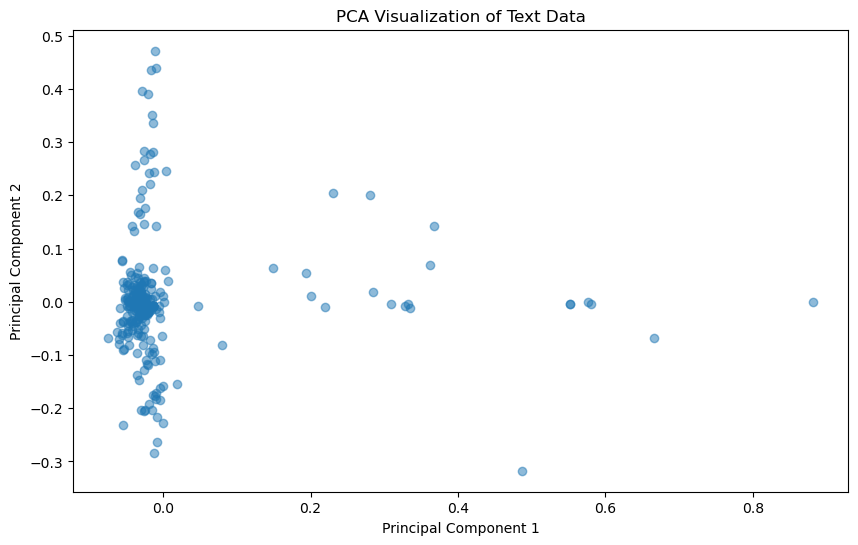

In [17]:


#Преобразование текстов в TF-IDF векторы. Уберем английские стоп-слова типа The,a,and итд.
tfidf_vectorizer = TfidfVectorizer(max_features=1100,stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)
#Применение TruncatedSVD (PCA для разреженных матриц)
svd = TruncatedSVD(n_components=300)
reduced_tfidf = svd.fit_transform(tfidf_matrix)


# Применение PCA для снижения размерности
pca_text = PCA(n_components=2)
reduced_pca_text = pca_text.fit_transform(reduced_tfidf)
#Визуализация результата PCA для текстовых данных
plt.figure(figsize=(10, 6))
plt.scatter(reduced_pca_text[:, 0], reduced_pca_text[:, 1], alpha=0.5)
plt.title('PCA Visualization of Text Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Выполнили преобразование к двум координатам. Отобразили на графике. Болшинство предложений попало в точку 0.0. Дисперсия по вертикальной оси.